In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 5))
plt.rcParams['font.size'] = 14
plt.rcParams["font.family"] = "Times New Roman"

In [80]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [4]:
file_name = "data/point_extraction_loss_compare.xlsx"
excel_file = pd.ExcelFile(file_name)
data = excel_file.parse(excel_file.sheet_names)

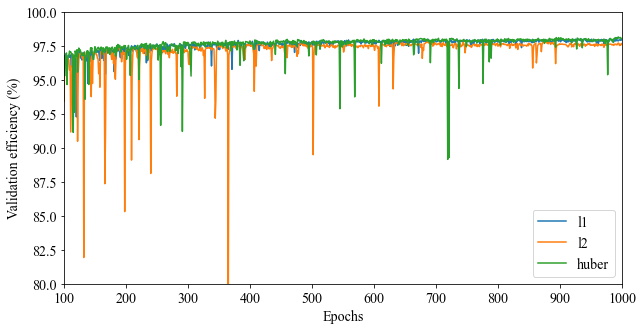

In [26]:
for sheet_name in data.keys():
    # label_name = r"σ = " + sheet_name.split("_")[-1]
    plt.plot(data[sheet_name]['Epoch'], data[sheet_name]['Efficiency'], '-', label=sheet_name)
    # Find the maximum value
    # max_coordinate = data[sheet_name]['efficiency'].argmax()

    # plt.scatter(data[sheet_name]['Threshold'][max_coordinate], data[sheet_name]['efficiency'][max_coordinate], marker="^")
plt.xlim(100, 1000)
plt.ylim(80, 100)
plt.xlabel("Epochs")
plt.ylabel("Validation efficiency (%)")
plt.legend()
plt.savefig("point_extraction_loss_compare.png", dpi=300, bbox_inches="tight")
plt.show()

In [38]:
adjacent_frame_file_name = "data/point_extraction_adjacent_frame.xlsx"
adjacent_frame_excel_file = pd.ExcelFile(adjacent_frame_file_name)
adjacent_frame_data = adjacent_frame_excel_file.parse(adjacent_frame_excel_file.sheet_names)

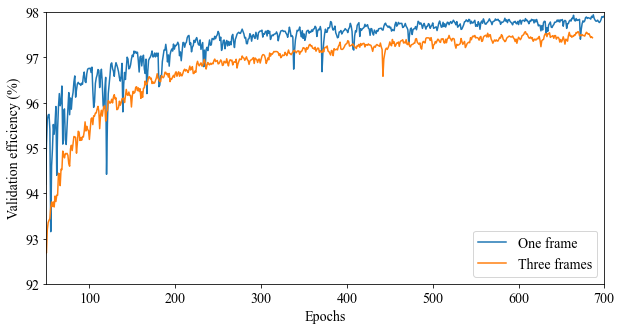

In [77]:
for sheet_name in adjacent_frame_data.keys():
    label_name = sheet_name.replace("_", " ").capitalize()
    plt.plot(adjacent_frame_data[sheet_name]['Epochs'], smooth(adjacent_frame_data[sheet_name]['Efficiency'], .5), '-', label=label_name)
plt.xlim(50, 700)
plt.ylim(92, 98)
plt.xlabel("Epochs")
plt.ylabel("Validation efficiency (%)")
plt.legend(loc='lower right')
plt.savefig("point_extraction_adjacent_frame_efficiency.png", dpi=300, bbox_inches="tight")
plt.show()

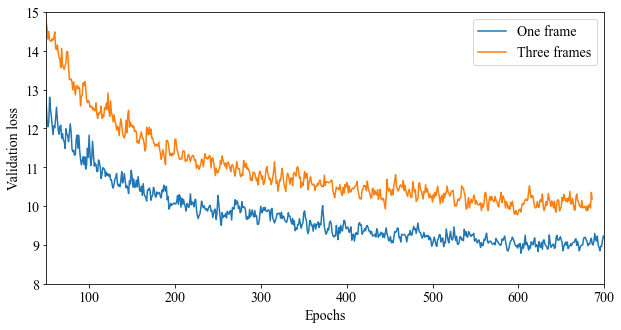

In [78]:
for sheet_name in adjacent_frame_data.keys():
    label_name = sheet_name.replace("_", " ").capitalize()
    plt.plot(adjacent_frame_data[sheet_name]['Epochs'], smooth(adjacent_frame_data[sheet_name]['Loss'], .5), '-', label=label_name)
plt.xlim(50, 700)
plt.ylim(8, 15)
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend(loc='upper right')
plt.savefig("point_extraction_adjacent_frame_loss.png", dpi=300, bbox_inches="tight")
plt.show()

In [81]:
accuracy_compare_file_name = "data/point_extraction_accuracy_compare.xlsx"
accuracy_compare = pd.ExcelFile(accuracy_compare_file_name)
accuracy_compare_data = accuracy_compare.parse(accuracy_compare.sheet_names)

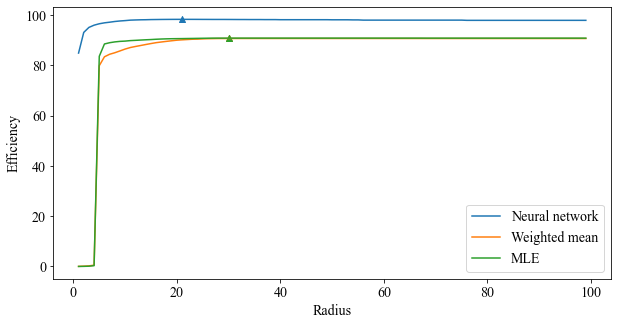

In [103]:
for sheet_name in accuracy_compare_data.keys():
    # label_name = sheet_name.replace("_", " ").capitalize()
    plt.plot(accuracy_compare_data[sheet_name]['Radius'], accuracy_compare_data[sheet_name]['Efficiency'], '-', label=sheet_name)

    max_coordinate = accuracy_compare_data[sheet_name]['Efficiency'].argmax()

    plt.scatter(accuracy_compare_data[sheet_name]['Radius'][max_coordinate], accuracy_compare_data[sheet_name]['Efficiency'][max_coordinate], marker="^")
# plt.xlim(0, 40)
# plt.ylim(80, 100)
plt.xlabel("Radius")
plt.ylabel("Efficiency")
plt.legend(loc='lower right')
plt.savefig("point_extraction_compare_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()

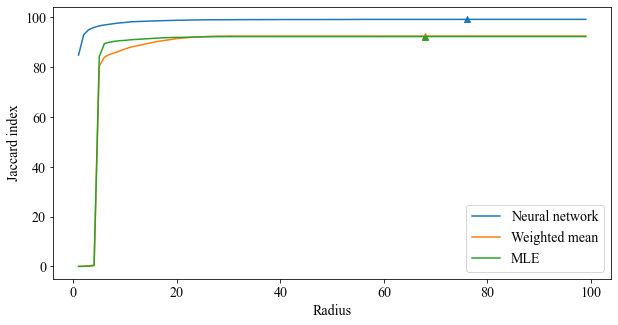

In [107]:
for sheet_name in accuracy_compare_data.keys():
    # label_name = sheet_name.replace("_", " ").capitalize()
    plt.plot(accuracy_compare_data[sheet_name]['Radius'], accuracy_compare_data[sheet_name]['JI'], '-', label=sheet_name)

    max_coordinate = accuracy_compare_data[sheet_name]['JI'].argmax()

    plt.scatter(accuracy_compare_data[sheet_name]['Radius'][max_coordinate], accuracy_compare_data[sheet_name]['JI'][max_coordinate], marker="^")
# plt.xlim(1, 40)
# plt.ylim(80, 100)
plt.xlabel("Radius")
plt.ylabel("Jaccard index")
plt.legend(loc='lower right')
plt.savefig("point_extraction_compare_ji.png", dpi=300, bbox_inches="tight")

In [108]:
# compare time
nn_time = 2.147212028503418 / 1000
wm_time = 6.792796850204468 / 1000
mle_time = 76.7593321800232 / 1000

In [110]:
mle_time / nn_time

35.74837098575848